In [ ]:
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [ ]:
from google.colab import files
files.upload()
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.27G/1.28G [00:21<00:00, 72.8MB/s]
100% 1.28G/1.28G [00:21<00:00, 63.2MB/s]


In [ ]:
import zipfile
local_zip = '/content/100-bird-species.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
#Creating generator for Training DataSet
train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('/content/train',target_size=(224, 224),batch_size=64,class_mode='categorical')

#Creating generator for Validation DataSet
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory('/content/valid',target_size=(224, 224),batch_size=32,class_mode='categorical')

#Creating generator for Test DataSet
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory('/content/test',target_size=(224, 224),batch_size=32,class_mode='categorical')

Found 29544 images belonging to 215 classes.
Found 1075 images belonging to 215 classes.
Found 1075 images belonging to 215 classes.


In [ ]:
#instantiate a base model with pre-trained weigts.
base_model=keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))

58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
#freeze the base model
base_model.trainable = False

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(2048,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(2048,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(215,activation='softmax',kernel_initializer='glorot_normal'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              51382272  
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 215)              

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=40,validation_data=val_generator,workers=10,use_multiprocessing=True)

Epoch 1/40
462/462 [==============================] - 397s 859ms/step - loss: 9.0988 - accuracy: 0.0749 - val_loss: 2.8479 - val_accuracy: 0.3405
Epoch 2/40
462/462 [==============================] - 361s 780ms/step - loss: 3.7011 - accuracy: 0.2908 - val_loss: 1.3898 - val_accuracy: 0.6214
Epoch 3/40
462/462 [==============================] - 365s 791ms/step - loss: 2.5986 - accuracy: 0.4805 - val_loss: 1.2391 - val_accuracy: 0.7647
Epoch 4/40
462/462 [==============================] - 364s 787ms/step - loss: 2.0046 - accuracy: 0.5929 - val_loss: 0.8035 - val_accuracy: 0.8140
Epoch 5/40
462/462 [==============================] - 363s 786ms/step - loss: 1.6436 - accuracy: 0.6625 - val_loss: 0.5808 - val_accuracy: 0.8493
Epoch 6/40
462/462 [==============================] - 365s 789ms/step - loss: 1.4380 - accuracy: 0.7080 - val_loss: 0.2312 - val_accuracy: 0.8781
Epoch 7/40
462/462 [==============================] - 367s 793ms/step - loss: 1.2481 - accuracy: 0.7436 - val_loss: 0.1301 -

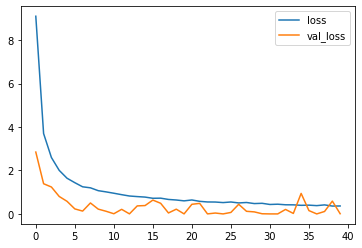

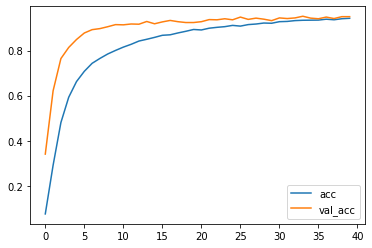

In [ ]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/My Drive/yolov3/birds.h5")

In [ ]:
model.evaluate(test_generator,use_multiprocessing=True,workers=10)

34/34 [==============================] - 12s 358ms/step


[8.5635492723668e-06, 0.9655814170837402]



In [ ]:
upload = files.upload()
print(upload)

Saving 1.jpg to 1.jpg
{'1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00\xe0\x00\xe0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\

In [ ]:
model.predict(upload)